# SMV model using HOG features on mask images

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import os
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from skimage.feature import hog

In [2]:
# Function to extract HOG features from an image
def extract_hog_features(image):
    return hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), multichannel=False) #extracts the HOG features of the images

# Load the dataset
data_path = '/content/drive/MyDrive/US dataset/Filtered-data/Reshaped'  # Replace with the path to the dataset
categories = ['benign', 'malignant', 'normal']   #This order should be the same as the order of the folders
images = []
labels = []

for category in categories:
    category_path = os.path.join(data_path, category)
    label = categories.index(category)
    for file_name in os.listdir(category_path):
        if 'mask' in file_name:  # Check if the file does contain 'mask' in its name
            image = cv2.imread(os.path.join(category_path, file_name), 0)  # Load as grayscale
            hog_features = extract_hog_features(image)
            images.append(hog_features)
            labels.append(label)

<ipython-input-2-cc48321cede8>:3: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), multichannel=False) #extracts the HOG features of the images


In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, stratify=labels, random_state=42)

# Train the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

In [4]:
# Calculate the accuracy and display the classification report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=categories))

Accuracy: 0.8072289156626506
Classification Report:
              precision    recall  f1-score   support

      benign       0.80      0.84      0.82        43
   malignant       0.71      0.65      0.68        26
      normal       1.00      1.00      1.00        14

    accuracy                           0.81        83
   macro avg       0.84      0.83      0.83        83
weighted avg       0.81      0.81      0.81        83



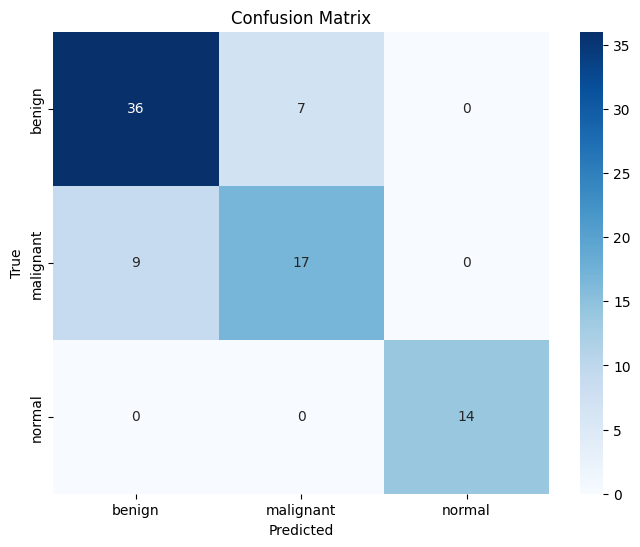

In [5]:
# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()